# LeetCode: [Valid Anagram](https://leetcode.com/problems/valid-anagram/)

__Difficulty: Easy__

__Data Structure(s): String__

<hr>

### Description:

Given two strings s and t, return true if t is an anagram of s, and false otherwise.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

 

Example 1:

> Input: s = "anagram", t = "nagaram"<br>Output: true

Example 2:

> Input: s = "rat", t = "car"<br>Output: false

 

Constraints:
* 1 <= s.length, t.length <= 5 * 104
* s and t consist of lowercase English letters.

 

Follow up: What if the inputs contain Unicode characters? How would you adapt your solution to such a case?

<hr>

*Fifth and final attempt: ASCII comparison w/ single list (way better time AND space complexity)*

__NOTE: this ONLY accounts for the consecutive 26 lowercase alphabet letters on the ASCII chart__
* *in that case, __4th attempt below__: it might be worth sacrificing a bit of time & space complexity to include the rest of the other characters*

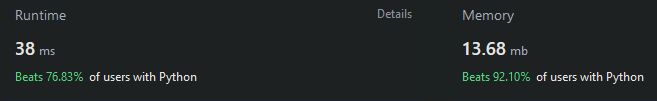

In [20]:
def isAnagram(s, t):
    """
    :type s: str
    :type t: str
    :rtype: bool
    """
    if len(s) != len(t):
        return False

    # create a list of 26 zeros that will each represent a frequency for each letter in the alphabet
    alphabet_frequency = [0] * 26
        
    # increment the frequency of characters in string s
    for x in s:
        alphabet_frequency[ord(x) - ord('a')] += 1
    
    # decrement the frequency of characters in string t
    for x in t:
        alphabet_frequency[ord(x) - ord('a')] -= 1
    

    ## GOAL: if anagrams, the incrementing/decrementing should result in a list of all 26 zeros (like it was originally)
        # otherwise, if there is any non-zerp numbers in list, then there are odd characters --> not an anagram

    # Check if any character has non-zero frequency
    for val in alphabet_frequency:
        if val != 0:
            return False
    
    return True


print(isAnagram("anagram", "nagaram"))
print(isAnagram("rat", "car"))
print(isAnagram("aa", "bb"))

True
False
False


*Fourth Attempt (better time complexity, better space complexity)*

Basically the corrected version of the initial attempt

In [19]:
def isAnagram(s, t):
    """
    :type s: str
    :type t: str
    :rtype: bool
    """
    if len(s) != len(t):
        return False

    letter_frequency = dict()

    for i in range(len(s)):
        letter_frequency[s[i]] = letter_frequency.get(s[i], 0) + 1
        letter_frequency[t[i]] = letter_frequency.get(t[i], 0) - 1

    for val in letter_frequency.values():
        if val != 0:
            return False

    return True


print(isAnagram("anagram", "nagaram"))
print(isAnagram("rat", "car"))
print(isAnagram("aa", "bb")) # NOW PASSES

True
False
False


*Third Attempt (a little bit better space complexity, but worse time complexity $O(N^2 * log N)$ b/c sorting)*

not a fan of this solution tbh

In [12]:
def isAnagram(s, t):
    """
    :type s: str
    :type t: str
    :rtype: bool
    """
    return sorted(s) == sorted(t)


print(isAnagram("anagram", "nagaram"))
print(isAnagram("rat", "car"))
print(isAnagram("aa", "bb")) # NOW PASSES

True
False
False


*Second Attempt (worse space complexity because needs a separate dictionary for each string)*

In [14]:
d = [0] * 26

d

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
def isAnagram(s, t):
    """
    :type s: str
    :type t: str
    :rtype: bool
    """
    if len(s) != len(t):
        return False

    letter_frequency_s = dict()
    letter_frequency_t = dict()

    for i in range(len(s)):
        letter_frequency_s[s[i]] = letter_frequency_s.get(s[i], 0) + 1
        letter_frequency_t[t[i]] = letter_frequency_t.get(t[i], 0) + 1

    for key in letter_frequency_s:
        if letter_frequency_s[key] != letter_frequency_t.get(key, 0):
            return False

    return True


print(isAnagram("anagram", "nagaram"))
print(isAnagram("rat", "car"))
print(isAnagram("aa", "bb")) # NOW PASSES

True
False
False


*Initial Attempt -- 87% test cases passed*

In [18]:
def isAnagram(s, t):
    """
    :type s: str
    :type t: str
    :rtype: bool
    """
    if len(s) != len(t):
        return False

    letter_frequency = dict()

    for i in range(len(s)):
        letter_frequency[s[i]] = letter_frequency.get(s[i], 0) + 1
        letter_frequency[t[i]] = letter_frequency.get(t[i], 0) + 1

    for val in letter_frequency.values():
        if val % 2 != 0:
            return False

    return True


print(isAnagram("anagram", "nagaram"))
print(isAnagram("rat", "car"))
print(isAnagram("aa", "bb")) # FAILED: expected false

True
False
True
